# Linear Regression & Variable Selection & Lasso & Ridge
### by 우현우 Hyunwoo Woo (Hub1)
#### Dept. of Industrial Engineering, Yonsei Univ
#### hw.woo@yonsei.ac.kr   (010 8966 5705)
#### blog: https://hub1.tistory.com
#### github repository: https://github.com/HyunwooWoo

# 상관계수 (상관관계) Correlation

In [7]:
import numpy as np

In [10]:
x = [5,8,3,3,5,9,10,8,3,8,2,3,7]
y = [6,9,1,2,4,10,11,4,1,7,5,6,8]

In [13]:
np.corrcoef(x, y) # 피어슨 상관계수

array([[1.        , 0.78408449],
       [0.78408449, 1.        ]])

In [16]:
np.corrcoef(x, y)[0, 1]

0.7840844915990768

In [12]:
z = [-3, -2, -1, 0, 1, 2, 3]
w = [9, 4, 1, 0, 1, 4, 9]

In [14]:
np.corrcoef(z, w)

array([[1., 0.],
       [0., 1.]])

In [15]:
np.corrcoef(z, w)[0, 1]

0.0

# 회귀분석 1 - Regression 1

In [85]:
import pandas as pd

In [86]:
df = pd.read_csv('cars.csv')

In [88]:
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


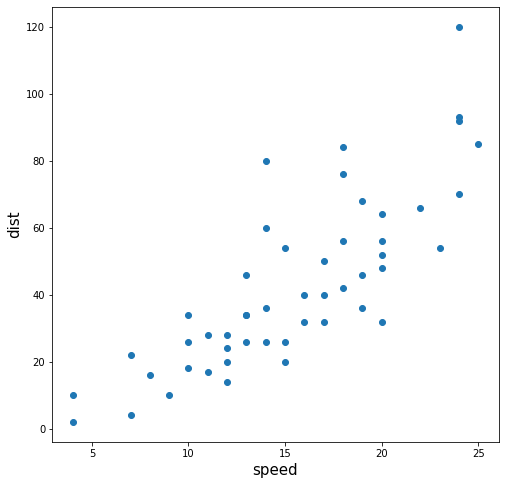

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['speed'],df['dist']) ## 원 데이터 산포도 (x,y)
 
plt.xlabel('speed', fontsize=font_size)
plt.ylabel('dist',fontsize=font_size)
plt.show()

In [4]:
from statsmodels.formula.api import ols

In [78]:
fit = ols('dist ~ speed', data=df).fit() #종속변수 ~ 독립변수

In [79]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.49e-12
Time:                        09:19:45   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
print(fit.params.Intercept) ## 절편
print(fit.params.speed) ## 기울기

-17.579094890510955
3.9324087591240877


### dist = -17.5791 + 3.9324 * speed

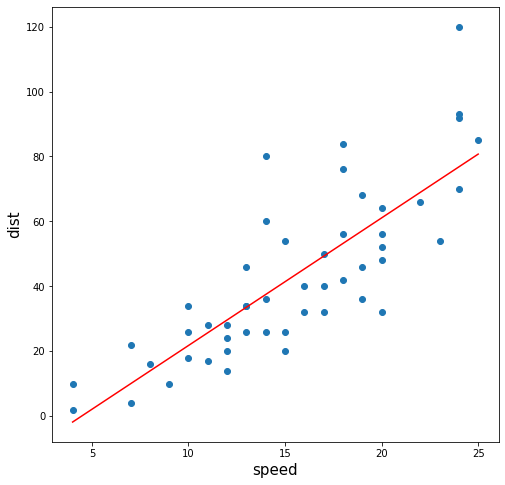

In [89]:
# 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['speed'],df['dist']) ## 원 데이터 산포도 (x,y)
plt.plot(df['speed'],fit.fittedvalues,color='red') ## 회귀직선 추가
 
plt.xlabel('speed', fontsize=font_size)
plt.ylabel('dist',fontsize=font_size)
plt.show()

# 회귀분석 2 - Regression 2

#### 단순선형회귀

In [87]:
import pandas as pd

In [90]:
df = pd.read_csv('cars.csv')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


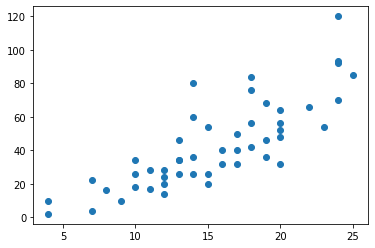

In [96]:
import matplotlib.pyplot as plt
X = df["speed"]
y = df["dist"]
plt.plot(X, y, 'o')
plt.show()

In [101]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

# X데이터를 넣을 때 .values.reshape(-1,1)를 해주어야 한다. 왜냐하면 X는 2차원 array 형태여야 하기 때문.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
line_fitter.coef_ #기울기값

array([3.93240876])

In [103]:
line_fitter.intercept_ #절편

-17.57909489051095

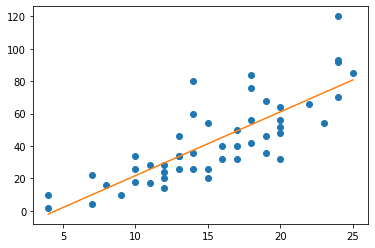

In [104]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

#### 다중선형회귀

In [86]:
import pandas as pd
df = pd.read_csv('dm_ex2.csv') ## 데이터 불러오기
# 또는 df = pd.read_csv('./surgical_unit.csv')

df.head()

,education,income,women,prestige,census
0,13.11,12351,11.16,68.8,1113
1,12.26,25879,4.02,69.1,1130
2,12.77,9271,15.70,63.4,1171
3,11.42,8865,9.11,56.8,1175
4,14.62,8403,11.68,73.5,2111


In [87]:
# Train: Test = 8:2 분리 (일반적으로 7:3)
from sklearn.model_selection import train_test_split
x = df[["education", "income", "women", "prestige"]]
y = df[["census"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [88]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
print(mlr.coef_) #회귀계수

[[-8.49126654e+02  3.79260347e-03 -1.47152031e+01  9.54361300e+00]]


In [90]:
print(mlr.intercept_) #절편

[14434.90001612]


In [91]:
print(mlr.score(x_train, y_train)) # R_squared (결정계수)

0.6923082766168993


In [92]:
y_predict = mlr.predict(x_test) # y 예측값 저장

In [93]:
# MSE = Mean Squared Error 구하기
## 방법1
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)

mse

1636001.3605759402

In [94]:
# MSE = Mean Squared Error 구하기
## 방법2
import numpy as np
def MSE(y, pred):
    return np.mean(np.square(y - pred))

MSE(y_test, y_predict)

census    1.636001e+06
dtype: float64

In [95]:
# RMSE = Root Mean Squared Error 구하기
## 방법1
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_predict))

rmse

1279.0626882901167

In [96]:
# RMSE = Root Mean Squared Error 구하기
## 방법2
def RMSE(y, pred):
    return np.sqrt(np.mean(np.square(y - pred)))

RMSE(y_test, y_predict)

census    1279.062688
dtype: float64

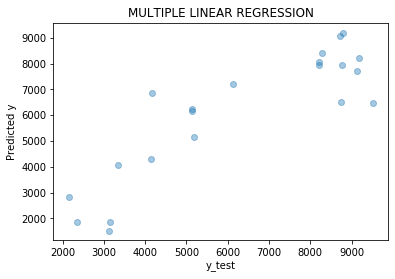

In [97]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("y_test")
plt.ylabel("Predicted y")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

# 카이제곱 검정 Chi-squared test

In [14]:
import pandas as pd

In [15]:
data = pd.read_csv('work_ex.txt', sep='\t', index_col=0)
data.head()

,Work_ex_Y,Work_ex_N
Hire_Y,64,10
Hire_N,84,57


In [16]:
import scipy.stats

In [17]:
chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(data)

In [18]:
print(chi2) #검정통계량 (카이제곱)
print(dof) #자유도

15.154425347637424
1


In [19]:
pvalue # p-value
# 일을 해본 경험과 졸업 후 고용되는 것이 독립이 아님(χ^2(1) = 15.15, p < 0.05)

# 영가설(Ho): 분할표의 행과 열은 독립적이다
# 대안가설(H1): 분할표의 행과 열은 독립적이지 않다

9.906584720516475e-05

# 변수선택법 Variable Selection

In [20]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('dm_ex2.csv') ## 데이터 불러오기
# 또는 df = pd.read_csv('./dm_ex2.csv')

In [22]:
df.head(5)

,education,income,women,prestige,census
0,13.11,12351,11.16,68.8,1113
1,12.26,25879,4.02,69.1,1130
2,12.77,9271,15.70,63.4,1171
3,11.42,8865,9.11,56.8,1175
4,14.62,8403,11.68,73.5,2111


In [23]:
from statsmodels.formula.api import ols
res = ols('census ~ education + income + women + prestige',data=df).fit() #종속변수 ~ 독립변수
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 census   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     60.49
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.58e-25
Time:                        13:43:17   Log-Likelihood:                -884.22
No. Observations:                 102   AIC:                             1778.
Df Residuals:                      97   BIC:                             1792.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e+04    609.242     23.764      0.000    1.33e+04    1.57e+04
education   -908.4030    105.694     -8.595      0.000   -1118.177    -698.629
income         0.0175      0.057      0.309      0.758      -0.095       0.130
women        -11.8237      5.598     -2.112      0.037     -22.933      -0.714
prestige      19.2600     18.587      1.036      0.303     -17.631      56.151
==============================================================================
Omnibus:                        5.030   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.711
Skew:                          -0.244   Prob(JB):                       0.0575
Kurtosis:                       4.051   Cond. No.                     3.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Forward Selection 전진 선택법
variables = df.columns[:-1].tolist() ## 설명 변수 리스트
 
y = df['census'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

C:\Users\hwwoo\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [25]:
selected_variables

['education', 'women']

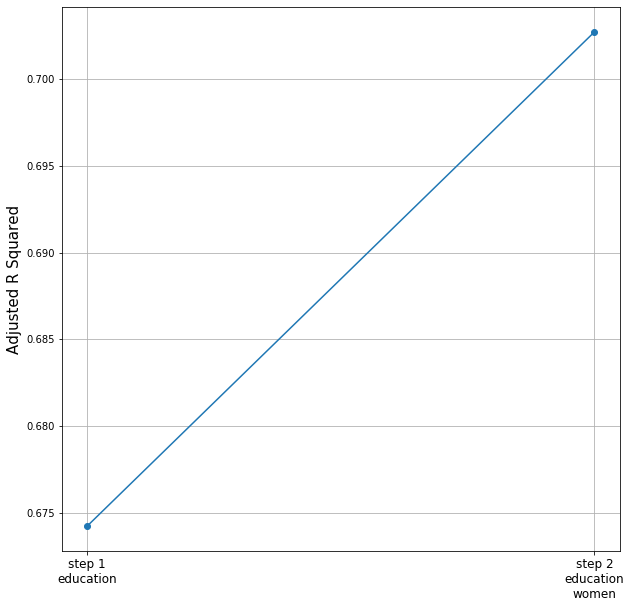

In [26]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [27]:
from statsmodels.formula.api import ols
res = ols('census ~ education + women', data=df).fit()
#종속변수 ~ 독립변수
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 census   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     120.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           3.11e-27
Time:                        13:43:28   Log-Likelihood:                -885.15
No. Observations:                 102   AIC:                             1776.
Df Residuals:                      99   BIC:                             1784.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.428e+04    590.439     24.191      0.000    1.31e+04    1.55e+04
education   -787.3144     52.695    -14.941      0.000    -891.872    -682.756
women        -14.7377      4.532     -3.252      0.002     -23.730      -5.745
==============================================================================
Omnibus:                        3.136   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.098
Skew:                          -0.110   Prob(JB):                        0.212
Kurtosis:                       3.825   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Backward Elimination 후진 소거법
variables = df.columns[:-1].tolist() ## 설명 변수 리스트
 
y = df['census'] ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [29]:
selected_variables

['education', 'women']

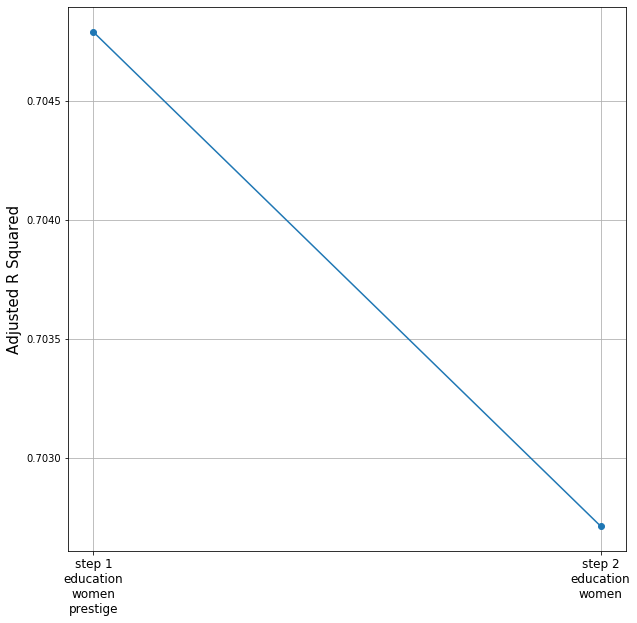

In [30]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [31]:
from statsmodels.formula.api import ols
res = ols('census ~ education + women', data=df).fit() #종속변수 ~ 독립변수
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 census   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     120.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           3.11e-27
Time:                        13:43:44   Log-Likelihood:                -885.15
No. Observations:                 102   AIC:                             1776.
Df Residuals:                      99   BIC:                             1784.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.428e+04    590.439     24.191      0.000    1.31e+04    1.55e+04
education   -787.3144     52.695    -14.941      0.000    -891.872    -682.756
women        -14.7377      4.532     -3.252      0.002     -23.730      -5.745
==============================================================================
Omnibus:                        3.136   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.098
Skew:                          -0.110   Prob(JB):                        0.212
Kurtosis:                       3.825   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Stepwise Selection 단계별 선택법
variables = df.columns[:-1].tolist() ## 설명 변수 리스트
 
y = df['census'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

C:\Users\hwwoo\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


In [33]:
selected_variables

['education', 'women']

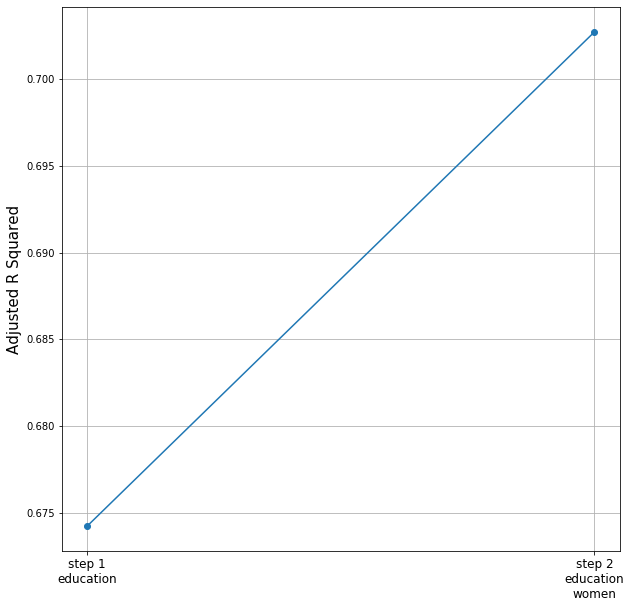

In [34]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [35]:
from statsmodels.formula.api import ols
res = ols('census ~ education + women', data=df).fit() #종속변수 ~ 독립변수
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 census   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     120.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           3.11e-27
Time:                        13:43:56   Log-Likelihood:                -885.15
No. Observations:                 102   AIC:                             1776.
Df Residuals:                      99   BIC:                             1784.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.428e+04    590.439     24.191      0.000    1.31e+04    1.55e+04
education   -787.3144     52.695    -14.941      0.000    -891.872    -682.756
women        -14.7377      4.532     -3.252      0.002     -23.730      -5.745
==============================================================================
Omnibus:                        3.136   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.098
Skew:                          -0.110   Prob(JB):                        0.212
Kurtosis:                       3.825   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Ridge, LASSO

In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
import pandas as pd
data = pd.read_csv('dm_ex2.csv') ## 데이터 불러오기
# 또는 df = pd.read_csv('./dm_ex2.csv')

data.head()

,education,income,women,prestige,census
0,13.11,12351,11.16,68.8,1113
1,12.26,25879,4.02,69.1,1130
2,12.77,9271,15.70,63.4,1171
3,11.42,8865,9.11,56.8,1175
4,14.62,8403,11.68,73.5,2111


In [4]:
# Train: Test = 7:3 분리 (일반적으로 7:3)
from sklearn.model_selection import train_test_split
X = data[["education", "income", "women", "prestige"]]
y = data[["census"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [5]:
X_train.shape # 71개의 observations (70%), 4개의 columns

(71, 4)

In [6]:
X_test.shape # 31개의 observations (30%), 4개의 columns

(31, 4)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [9]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.score(X_train,y_train)

0.7557778359568431

In [11]:
# Test set 성능 평가 방법1
model.score(X_test, y_test)

0.487926547375521

In [12]:
# Test set 성능 평가 방법1
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

0.487926547375521

In [13]:
ridge_alpha = 1
lasso_alpha = 0.1

linear = LinearRegression()
ridge = Ridge(alpha = ridge_alpha)
lasso = Lasso(alpha = lasso_alpha)

In [14]:
linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
linear_y_hat = linear.predict(X_test)
ridge_y_hat = ridge.predict(X_test)
lasso_y_hat = lasso.predict(X_test)

linear_r2, ridge_r2, lasso_r2 = r2_score(y_test,linear_y_hat), r2_score(y_test,ridge_y_hat), r2_score(y_test,lasso_y_hat)
linear_MSE, ridge_MSE, lasso_MSE = mean_squared_error(y_test,linear_y_hat), mean_squared_error(y_test,ridge_y_hat), mean_squared_error(y_test,lasso_y_hat)
linear_MAE, ridge_MAE, lasso_MAE = mean_absolute_error(y_test,linear_y_hat), mean_absolute_error(y_test,ridge_y_hat), mean_absolute_error(y_test,lasso_y_hat)

print('R2 score - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_r2, ridge_r2, lasso_r2))
print('MSE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MSE, ridge_MSE, lasso_MSE))
print('MAE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MAE, ridge_MAE, lasso_MAE))

R2 score - Linear: 0.49, Ridge: 0.49, Lasso: 0.49
MSE - Linear: 3188114.30, Ridge: 3189756.85, Lasso: 3188129.57
MAE - Linear: 1361.35, Ridge: 1361.63, Lasso: 1361.35


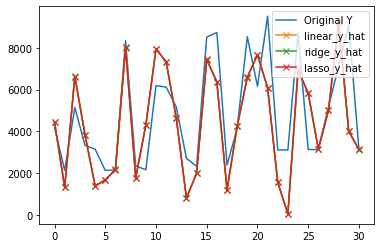

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), linear_y_hat, '-x', label="linear_y_hat")
ax.plot(range(len(y_test)), ridge_y_hat, '-x', label="ridge_y_hat")
ax.plot(range(len(y_test)), lasso_y_hat, '-x', label="lasso_y_hat")
plt.legend(loc='upper right')
plt.show()

In [17]:
# Let's predict

ridge_result = []
lasso_result = []
alpha = [0.001,0.01,0.1,1,10]

for a in alpha:
  ridge = Ridge(alpha = a)
  lasso = Lasso(alpha = a)

  ridge.fit(X_train,y_train)
  lasso.fit(X_train,y_train)

  ridge_y_hat = ridge.predict(X_test)
  lasso_y_hat = lasso.predict(X_test)

  ridge_r2, lasso_r2 = r2_score(y_test,ridge_y_hat), r2_score(y_test,lasso_y_hat)
  ridge_result.append(ridge_r2)
  lasso_result.append(lasso_r2)

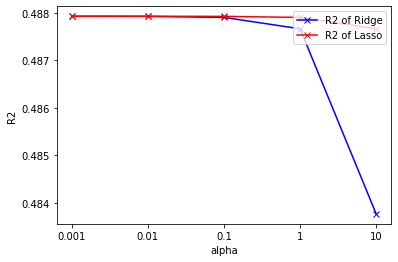

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(5), ridge_result, '-x', c='blue', label="R2 of Ridge")
ax.plot(range(5), lasso_result, '-x', c='red', label="R2 of Lasso")
plt.xticks(range(5), alpha)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend(loc='upper right')
plt.show()

# LASSO가 더 좋은 성능을 보임

### Appendix: Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [77]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [83]:
X_train_std

array([[ 0.55550343, -0.88725525,  1.92980945, -0.74936517],
       [ 0.32299406,  0.32333266, -0.59820825,  0.47637004],
       [ 1.62504653,  0.28321298,  0.70419576,  1.1636982 ],
       [ 0.1977967 ,  0.04016238, -0.04888812,  0.07542862],
       [ 1.67512547,  0.64685586,  0.30306745,  0.7169349 ],
       [-1.22587606, -0.78089145,  0.2586099 , -1.6314363 ],
       [-1.29384033, -0.35473652, -0.85316553, -0.39424562],
       [-0.15991002,  0.28531227, -0.82150637, -0.18804718],
       [-0.19210362, -0.0834622 , -0.41465247, -0.20523038],
       [ 1.17791313,  0.37441527, -0.35571254,  0.45918684],
       [-1.0577539 , -0.75523352,  0.14106685, -1.47105973],
       [-1.03629149, -0.39322342, -0.29071022, -1.17894527],
       [-0.61777463, -0.03121332, -0.72787609, -0.09067569],
       [-0.75370318, -0.23531051, -0.41330527, -0.56607766],
       [-0.82166746,  0.48054581, -0.85013434,  0.304538  ],
       [-0.72866371, -0.67406115, -0.34965015, -1.465332  ],
       [ 0.1977967 , -0.

In [84]:
X_test_std

array([[ 0.1656031 , -0.64023933,  1.25755748, -0.58326086],
       [ 1.87186417,  2.90242137, -0.69924812,  2.09159121],
       [ 1.41757663, -0.49772118, -0.73259128,  1.54745642],
       [ 1.31384168, -0.11285219,  0.97262503,  0.53364739],
       [ 1.75382095,  1.71282632, -0.78142722,  1.85102635],
       [ 0.29437752, -0.58075958,  1.68495615,  0.10979503],
       [ 1.29237928, -0.16510107,  1.72469851,  0.70547943],
       [ 0.38022713,  0.30583861, -0.43115565,  0.08688409],
       [-0.15633295,  0.20903823, -0.84575594,  0.25871613],
       [-0.38168819,  0.48404462, -0.87202631, -0.13076983],
       [ 0.28006925, -0.57656101,  1.42629407,  0.20716651],
       [-1.14718058, -0.89098731,  1.46233163, -1.43096559],
       [ 1.49269504,  2.49072818, -0.6392978 ,  1.2954361 ],
       [-0.2493367 ,  0.15445681, -0.29811981, -0.24532452],
       [ 1.10279471, -0.40302008,  1.91195908,  1.50736228],
       [-0.78947385,  0.02523413, -0.85148154, -0.16513624],
       [ 0.92036429,  1.

In [78]:
from sklearn.linear_model import LinearRegression
model_std = LinearRegression()

In [79]:
model_std.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
model_std.score(X_train_std, y_train)

0.07583858536130095

In [81]:
model_std.score(X_test_std, y_test)

-0.35838931706520283

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, model_std.predict(X_test_std))

-0.35838931706520283

#### 참고링크
https://zephyrus1111.tistory.com/52

http://hleecaster.com/ml-linear-regression-example/

http://hleecaster.com/ml-multiple-linear-regression-example/

https://wotres.tistory.com/entry/%ED%9A%8C%EA%B7%80-%EC%97%B0%EC%86%8D%ED%98%95-%EB%B3%80%EC%88%98-%EC%B8%A1%EC%A0%95%ED%95%98%EB%8A%94%EB%B2%95-MSE-RMSE-MAE-MPE-MAPE-in-python?category=930448

https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html#scikit-learn

https://zephyrus1111.tistory.com/65

https://m.blog.naver.com/hsj2864/220831822625

https://jjeongil.tistory.com/870

https://zephyrus1111.tistory.com/91

https://asthtls.tistory.com/295